In [39]:
import cv2
import matplotlib.pylab as plt
import numpy as np
from glob import glob

In [45]:
def add_edges(image, area_lim=1000):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (5,5), 0)
    thresh = cv2.adaptiveThreshold(blur, 255, 1, 1, 11, 2)
    contours,_ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    max_area = 0
    c = 0
    for i in contours:
        area = cv2.contourArea(cv2.UMat(i))
        if area > area_lim:
            if area > max_area:
                max_area = area
                best_cnt = i
                image = cv2.drawContours(image, contours, c, (0, 255, 0), 3)
        c+=1

    mask = np.zeros((gray.shape),np.uint8)
    cv2.drawContours(mask,[best_cnt],0,255,-1)
    cv2.drawContours(mask,[best_cnt],0,0,2)

    out = np.zeros_like(gray)
    out[mask == 255] = gray[mask == 255]
    blur = cv2.GaussianBlur(out, (11,11), 0)
    thresh = cv2.adaptiveThreshold(blur, 255, 1, 1, 11, 2)

    c = 0
    for i in contours:
        area = cv2.contourArea(i)
        if area > 1000/2:
            cv2.drawContours(image, contours, c, (0, 255, 0), 3)
        c+=1
    return image

In [46]:
imgs = glob('temp/*.png')

In [73]:
# plt.imread(fn)

# Pull the IRL Board

In [126]:
cv2.imwrite('test.png', cv2.cvtColor(irl_board, cv2.COLOR_RGB2BGR))

True

In [135]:
835 + 8

843

In [137]:
fn

'temp/u-6gXgzNM6s_example_frame.png'

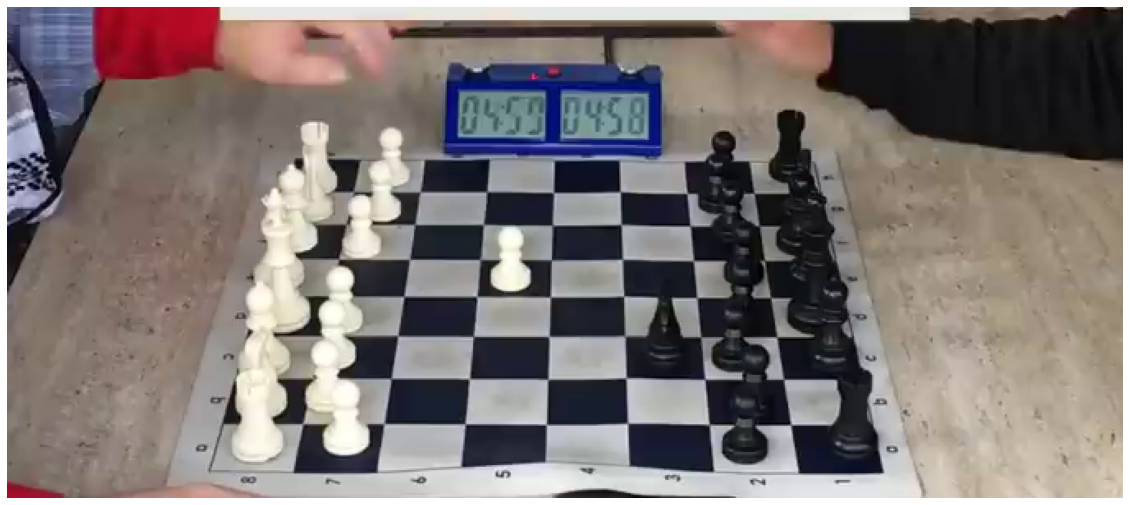

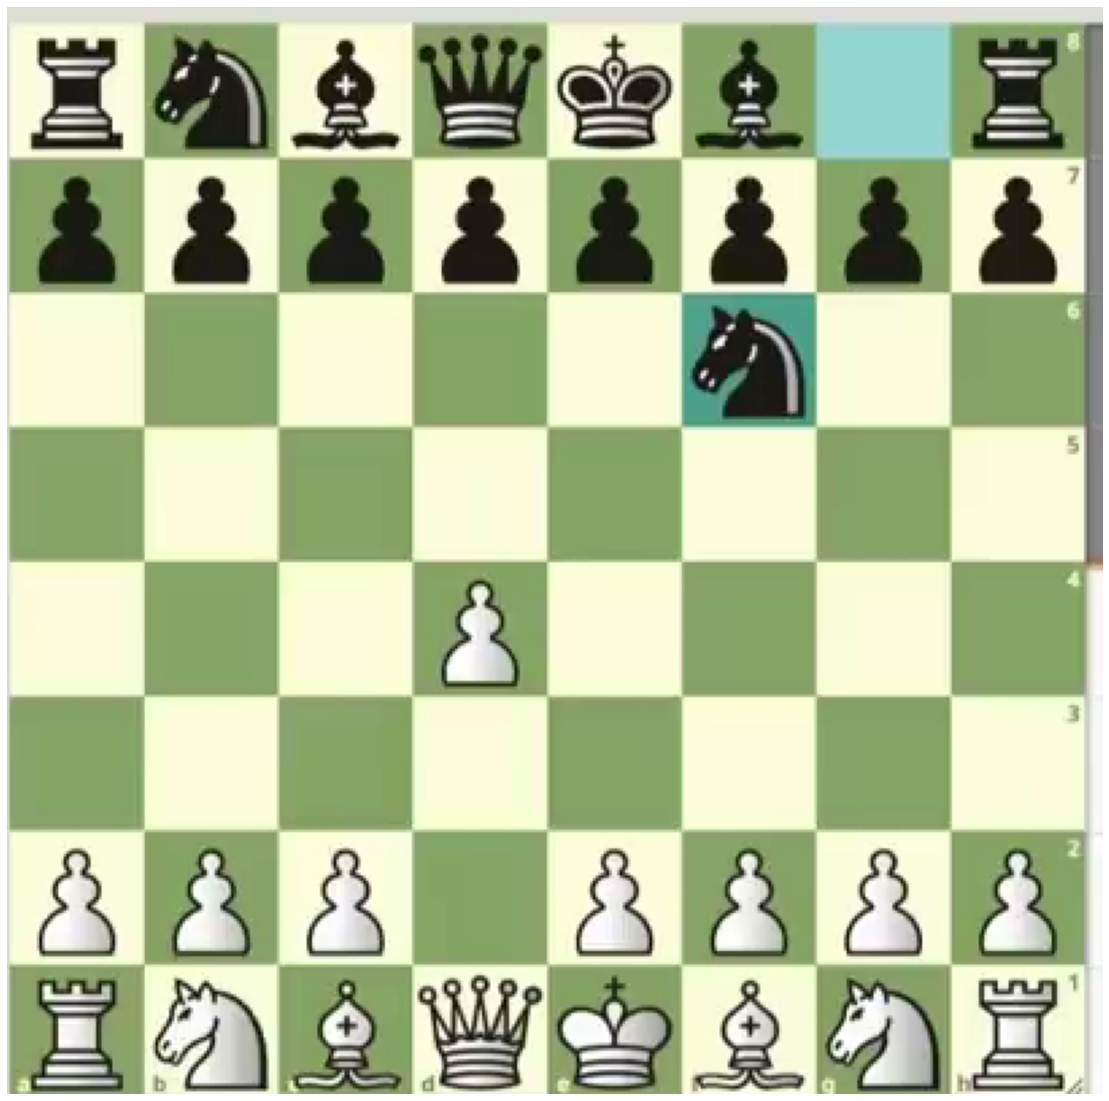

In [136]:
gt_board_loc=[6, 409, 437, 843]

for fn in imgs:
    image = cv2.imread(fn)
    fig, ax = plt.subplots(figsize=(20,20))
    img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    irl_board = img_rgb[420:-1,300:-300,:].copy()
    plt.imshow(irl_board)
    ax.axis('off')
    plt.show()
    fig, ax = plt.subplots(figsize=(20,20))
    irl_board = img_rgb[gt_board_loc[0]:gt_board_loc[1],gt_board_loc[2]:gt_board_loc[3],:].copy()
    plt.imshow(irl_board)
    ax.axis('off')
    plt.show()
    break

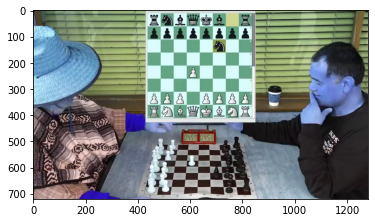

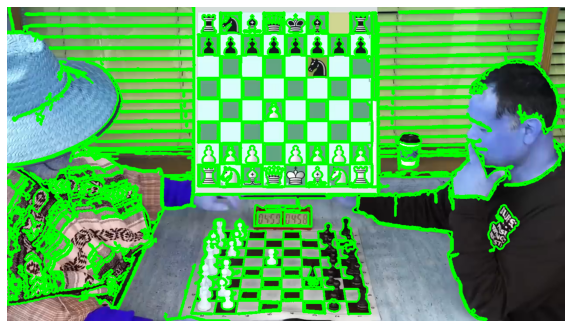

In [ ]:
for fn in imgs:
    image = cv2.imread(fn)
    plt.imshow(image)
    plt.show()
    image = add_edges(image, area_lim=150_000)
    fig, ax = plt.subplots(figsize=(10, 10))
    plt.imshow(image)
    ax.axis('off')
    plt.show()
    break

# Try CV2.findchessboard

In [98]:
image = cv2.imread(fn)
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
CHECKERBOARD_WIDTH = 16
CHECKERBOARD_HEIGHT = 16
gray_cropped = gray[0:450,400:900]
for height in range(3, 50):
    ret, corners = cv2.findChessboardCorners(gray_cropped, (height,height),None)
    if ret:
        print(f'Worked for {height}')
        break

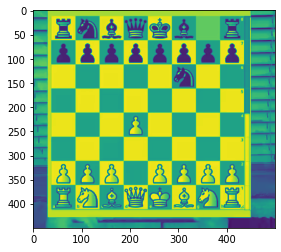

In [104]:
plt.imshow(gray_cropped)